<p style ="color: #118ab2;
                    font-size:50px; 
                    font-style:bold;
                    text-decoration: underline;
                    text-align: center ">
    Weight Predictor 
</p>


<img src='http://wiki.stat.ucla.edu/socr/uploads/a/ae/SOCR_Data_Dinov_HeightWeight_062408_Fig1.jpg'>

<h2 style ="color: #c1121f;font-size:35px; font-style:bold; text-decoration: underline;"> Step 1: Acquire </h2>

### Step 1.a: Explore Problem
    
##### Problem is to predict Human Weight with Given Height.<br>

   
### Step 1.b: Indentify Data

##### Human height and weight dataset are availble in <a href = 'https://gist.github.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb'>GitHub</a> website .
 

### Step 1.d: import Data


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<h2 style ="color: #c1121f;font-size:35px; font-style:bold; text-decoration: underline;"> Step 2: Prepare </h2>

### Step 2.a: Explore data

In [4]:
len(data)

10000

In [5]:
data.shape

(10000, 3)

<p style ="color: #fb8500;font-size:20px; font-style:bold;"> Analysis 1:- Rows 25000  and 3 Columns</p>

In [6]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

<p style ="color: #fb8500;font-size:20px; font-style:bold;"> Analysis 2. Only 2 Feature ('Height(Inches)', 'Weight(Pounds)' Are Important  </p>

In [7]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<p style ="color: #fb8500;font-size:20px; font-style:bold;"> Analysis 3.No Null Data in Features</p>

In [8]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


<p style ="color: #fb8500;font-size:20px; 
                    font-style:bold;" > Analysis 4. Feature 'Height' Unit is in 'Inches' which need to change in 'Feet' & 'Weight' unit is 'Pounds' that need to change in 'Kilogram(KG)'</p>

### Step 2.b: Clean data

In [10]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [11]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [12]:
# Convert Height(Inches) to Height(Feet) [1 Inche = 0.083 Foot]
data['Height']=round(data['Height'].apply(lambda x : x * 0.083),1)
data.head()

,Gender,Height,Weight
0,Male,6.1,241.893563
1,Male,5.7,162.310473
2,Male,6.2,212.740856
3,Male,6.0,220.042470
4,Male,5.8,206.349801


In [13]:
# Convert Weight(Pounds) to Weight(Kilogram) [1 Pounds = 0.4536 Kilograms]
data['Weight']=round(data['Weight'].apply(lambda x : x * 0.4536),3)
data.head()

,Gender,Height,Weight
0,Male,6.1,109.723
1,Male,5.7,73.624
2,Male,6.2,96.499
3,Male,6.0,99.811
4,Male,5.8,93.600


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [15]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,5.508530,73.229345
std,0.320585,14.564388
min,4.500000,29.348000
25%,5.300000,61.607500
50%,5.500000,73.126000
75%,5.700000,84.899750
max,6.600000,122.467000


In [16]:
data['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

### Step 2.c: Vvalue_countsize data

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

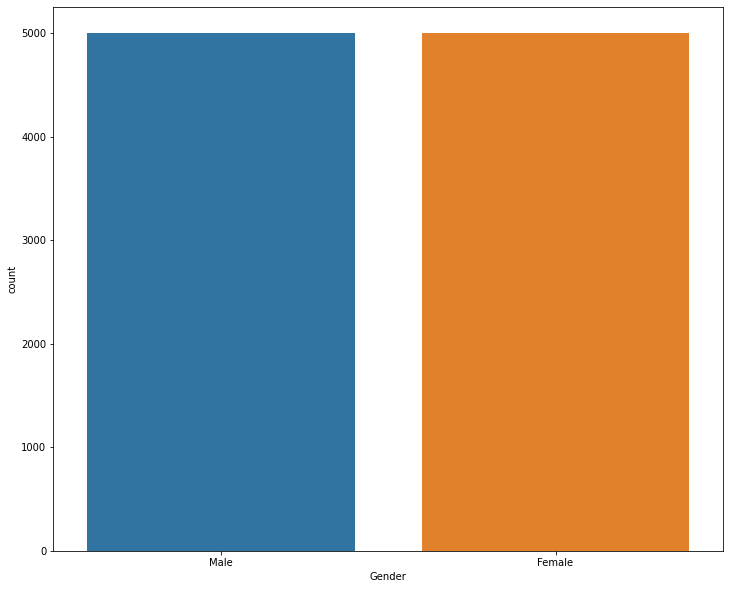

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(data['Gender'])
plt.show()

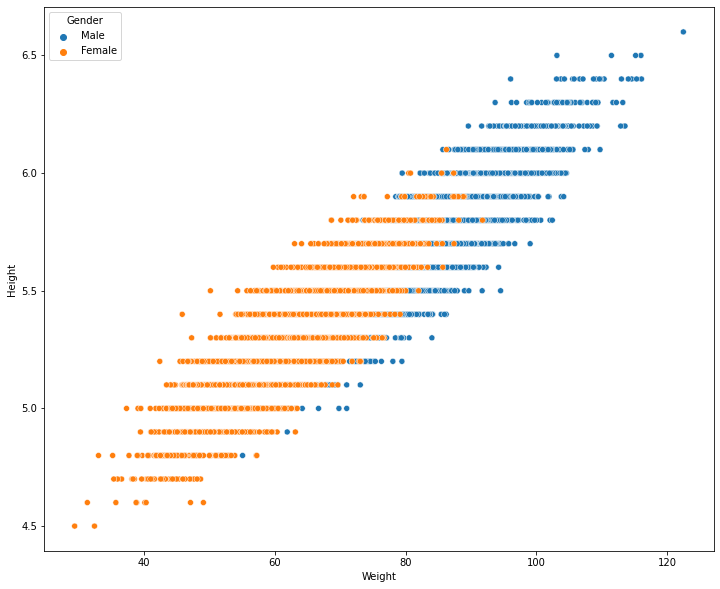

In [19]:
plt.figure(figsize=(12,10))
sns.scatterplot(y=data['Height'],x=data['Weight'],hue=data['Gender'])
plt.show()

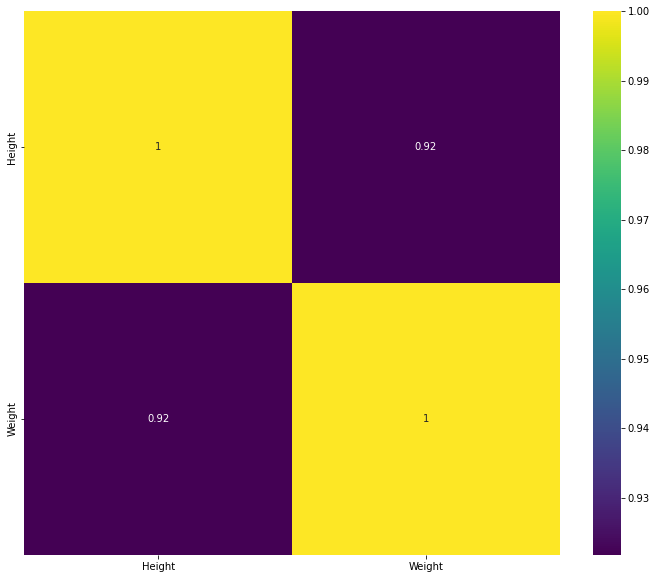

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

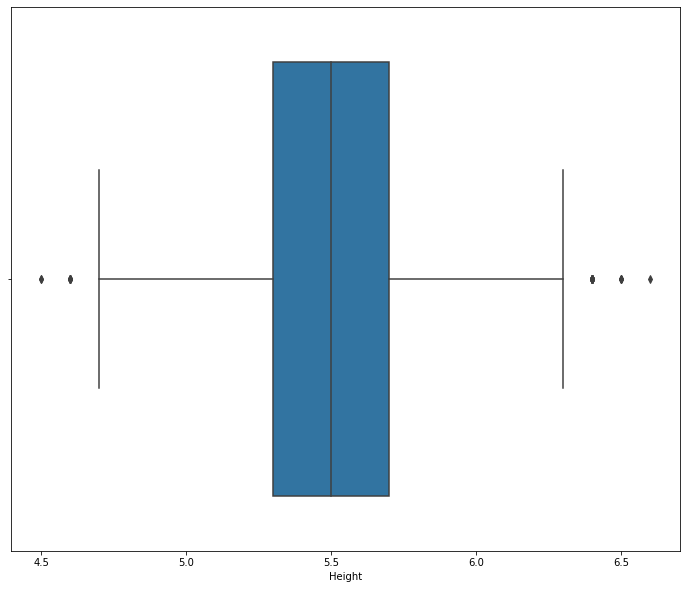

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(data['Height'])
plt.show()

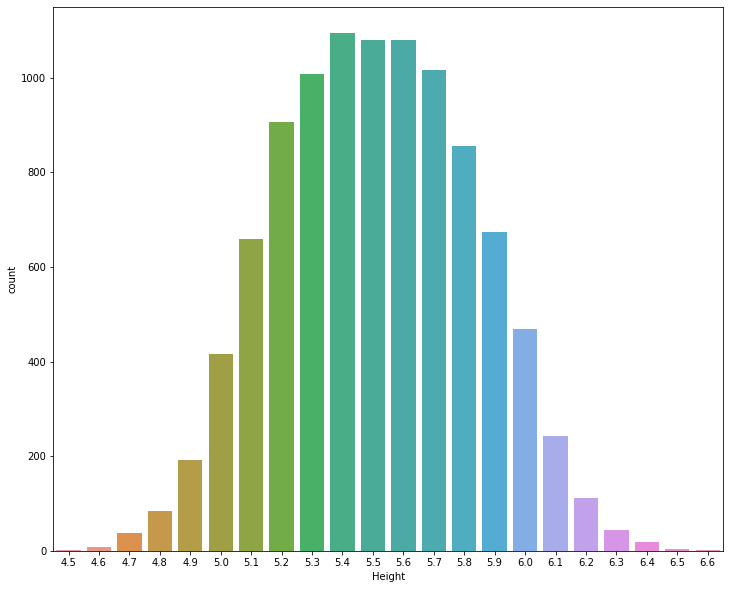

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(data['Height'])
plt.show()

In [23]:
data['Height'].unique()

array([6.1, 5.7, 6.2, 6. , 5.8, 5.6, 5.3, 5.9, 5.4, 5.5, 5.2, 5.1, 6.4,
       6.3, 5. , 6.5, 6.6, 4.9, 4.8, 4.7, 4.6, 4.5])

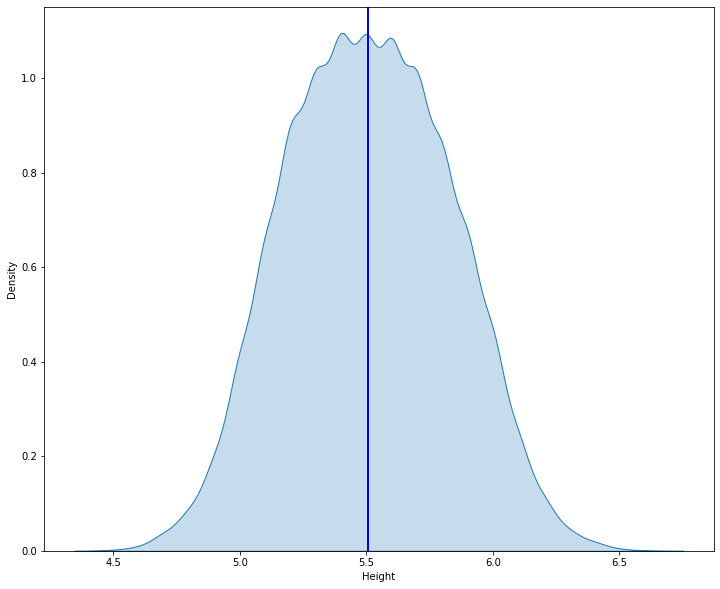

In [24]:

plt.figure(figsize=(12,10))
sns.kdeplot(data['Height'],shade=True);
plt.axvline(data['Height'].mean(),color='blue',linewidth=2)
plt.show()

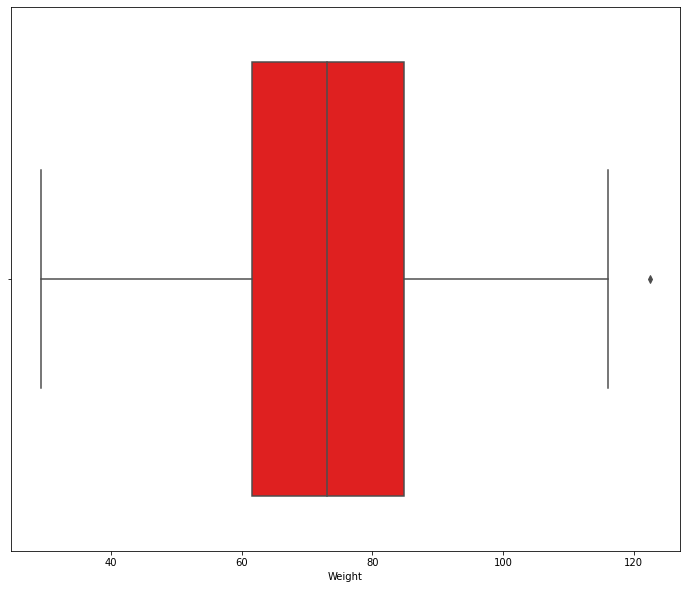

In [25]:
plt.figure(figsize=(12,10))
sns.boxplot(data['Weight'],color='red')
# sns.boxenplot(data['Weight'])
plt.show()

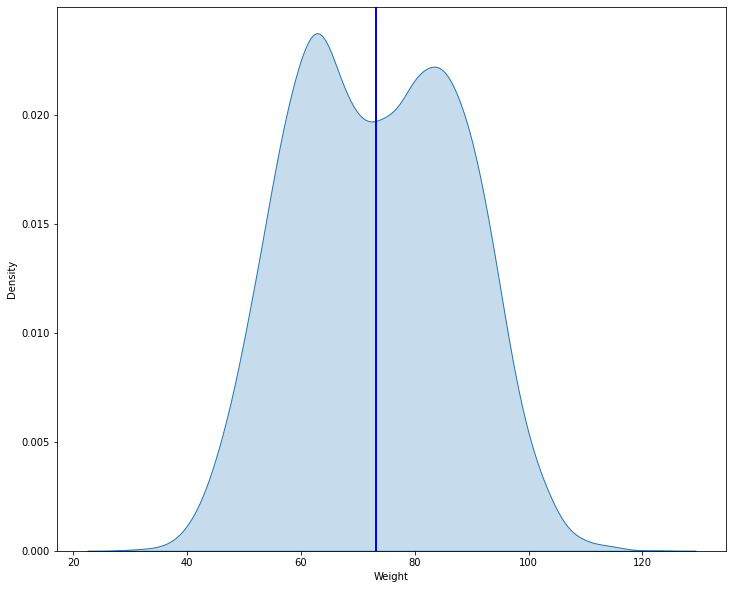

In [26]:

plt.figure(figsize=(12,10))
sns.kdeplot(data['Weight'],shade=True);
plt.axvline(data['Weight'].mean(),color='blue',linewidth=2)
plt.show()

<Figure size 2520x2520 with 0 Axes>

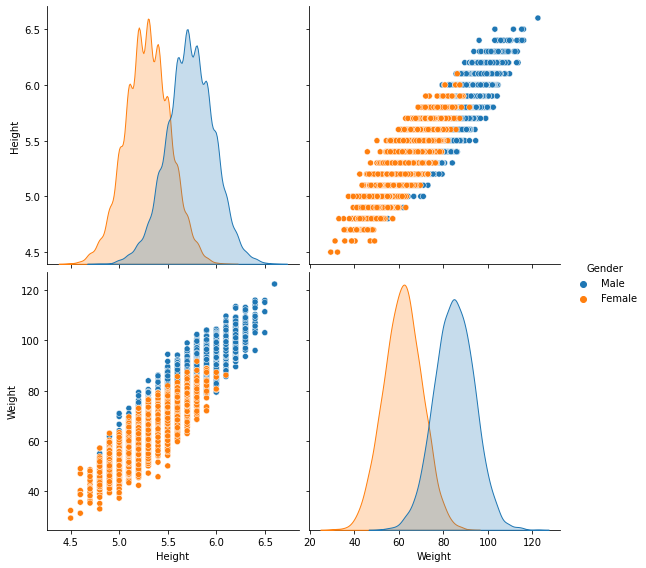

In [27]:

plt.figure(figsize=(35,35))
sns.pairplot(data,hue='Gender', size=4)
plt.show();

In [28]:
data.groupby(by='Gender').describe()

Height                                              Weight             \
         count     mean       std  min  25%  50%  75%  max   count       mean   
Gender                                                                          
Female  5000.0  5.28780  0.225941  4.5  5.1  5.3  5.4  6.1  5000.0  61.626137   
Male    5000.0  5.72926  0.238867  4.8  5.6  5.7  5.9  6.6  5000.0  84.832553   

                                                               
             std     min       25%      50%      75%      max  
Gender                                                         
Female  8.628591  29.348  55.76275  61.7430  67.5005   91.735  
Male    8.972733  51.213  78.87575  84.8385  90.8825  122.467

In [29]:
data.groupby(by='Gender').corr()

Height    Weight
Gender                           
Female Height  1.000000  0.843486
       Weight  0.843486  1.000000
Male   Height  1.000000  0.859027
       Weight  0.859027  1.000000

In [30]:
data_original=data.copy(deep=True)
data_Try=data.copy(deep=True)

# Label Encode

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_Try['Gender']=le.fit_transform(data_Try['Gender'])
data_Try.head()

,Gender,Height,Weight
0,1,6.1,109.723
1,1,5.7,73.624
2,1,6.2,96.499
3,1,6.0,99.811
4,1,5.8,93.600


In [32]:
data_Try['Gender'].unique()

array([1, 0])

# Scalized

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
data_Try['Height']=sc.fit_transform(data_Try[['Height']])

In [35]:
data_Try

,Gender,Height,Weight
0,1,1.845065,109.723
1,1,0.597282,73.624
2,1,2.157011,96.499
3,1,1.533120,99.811
4,1,0.909228,93.600
...,...,...,...
9995,0,-0.026609,62.042
9996,0,0.285337,77.506
9997,0,-0.650500,58.276
9998,0,0.597282,74.323


In [77]:
X = data_Try.drop(columns='Weight')
y = data_Try['Weight']


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [80]:
X_train.shape

(8000, 2)

In [81]:
data_Try.corr()

,Gender,Height,Weight
Gender,1.000000,0.688558,0.796723
Height,0.688558,1.000000,0.921809
Weight,0.796723,0.921809,1.000000


# Model Section

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
model_parameter ={

"Linear_Regression" :{
                        "model" : LinearRegression(),
                        "param" : {}
                    },

"Decision_Tree_Regressor" :{
                        "model" : DecisionTreeRegressor(),
                        "param" : {
                                   'splitter' : ["best"],
                                   'ccp_alpha':[0.1,0.0,0.3]
                                  }
                            },

"SVR" : {
                        "model" : SVR(),
                        "param" : {}
       },

"KNeighbors_Classifier_Regressor" : {
                        "model" : KNeighborsRegressor(),
                        "param" : {'n_neighbors' : [4,5,6],
                                  'weights' : ['uniform', 'distance']
                                  }
},
                       

"Random_Forest_Regressor" :{
                    "model" : RandomForestRegressor(),
                    "param" : {'criterion' : ["squared_error", "absolute_error"],
                              'n_estimators':[100,85,90]
                              }
                      },
    

"Bagging_Regressor" :{
                    "model" : BaggingRegressor(oob_score=True,max_samples = 0.8),
                    "param" : {}
                      },

 "AdaBoost_Regressor" :{
                    "model" : AdaBoostRegressor(),
                    "param" : {}
                      },

"Gradient_Boosting_Regressor" :{
                    "model" : GradientBoostingRegressor(),
                    "param" : {}
                      },

"XGB_Regressor" :{
                    "model" : XGBRegressor(),
                    "param" : {}
                      },
}

In [84]:
# Model Section 

Report = []
for model_name ,model_param in model_parameter.items():
    gs = GridSearchCV(model_param['model'],model_param['param'],cv = 5,return_train_score=False)
    gs.fit(X,y)
    Report.append({'Model': model_name,
                 'Best_Score' : gs.best_score_,
                 'Best_Parameter' : gs.best_params_})

Model_Report = pd.DataFrame(Report,columns=['Model','Best_Score','Best_Parameter'])


In [85]:
Model_Report.sort_values(by='Best_Score',ascending=False)

,Model,Best_Score,Best_Parameter
0,Linear_Regression,0.758141,{}
4,Random_Forest_Regressor,0.756820,"{'criterion': 'squared_error', 'n_estimators':..."
1,Decision_Tree_Regressor,0.756712,"{'ccp_alpha': 0.0, 'splitter': 'best'}"
7,Gradient_Boosting_Regressor,0.756687,{}
8,XGB_Regressor,0.756656,{}
5,Bagging_Regressor,0.756619,{}
2,SVR,0.750773,{}
6,AdaBoost_Regressor,0.739353,{}
3,KNeighbors_Classifier_Regressor,0.697117,"{'n_neighbors': 6, 'weights': 'distance'}"


In [86]:
model_clf = {
    'RFR' : RandomForestRegressor(criterion= 'squared_error', n_estimators= 100),
    'DTR': DecisionTreeRegressor(ccp_alpha = 0.0, splitter= 'best'),
    'XGB' :XGBRegressor(),
    'GBR':GradientBoostingRegressor(),
    'BR':BaggingRegressor(),
    'LR':LinearRegression(),
    'ABR':AdaBoostRegressor(),
    'SVR':SVR(),
    'KNNR':KNeighborsRegressor(n_neighbors= 4, weights= 'distance')
}

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
def train_regression(clf, X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)*100
    return score

In [89]:
train_regression(LinearRegression(), X_train,y_train,X_test,y_test)

89.45190763705351

In [90]:
Score =[] 

for model_name,clf in model_clf.items():

    score= train_regression(clf, X_train,y_train,X_test,y_test)

    Score.append({'Model': model_name,
                 'Score' : score,
                 
                 })
Score_Report = pd.DataFrame(Score,columns=['Model','Score']) 
Score_Report

,Model,Score
0,RFR,89.343471
1,DTR,89.350318
2,XGB,89.350335
3,GBR,89.339512
4,BR,89.336677
5,LR,89.451908
6,ABR,88.468028
7,SVR,89.365308
8,KNNR,88.505089


In [91]:
Score_Report.sort_values(by='Score',ascending=False)

,Model,Score
5,LR,89.451908
7,SVR,89.365308
2,XGB,89.350335
1,DTR,89.350318
0,RFR,89.343471
3,GBR,89.339512
4,BR,89.336677
8,KNNR,88.505089
6,ABR,88.468028


# Sklearn Pipeline

In [102]:
X = data_original[['Gender','Height']]
y = data_original['Weight']
X.head()

,Gender,Height
0,Male,6.1
1,Male,5.7
2,Male,6.2
3,Male,6.0
4,Male,5.8


In [103]:
labelized = LabelEncoder()
X['Gender']=labelized.fit_transform(X['Gender'])
X.head()

,Gender,Height
0,1,6.1
1,1,5.7
2,1,6.2
3,1,6.0
4,1,5.8


In [104]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [105]:
X_test

,Gender,Height
256,1,5.9
2584,1,5.9
2423,1,5.6
1048,1,5.9
2979,1,5.6
...,...,...
7350,0,5.2
2575,1,5.7
2772,1,6.2
4713,1,5.7


In [106]:
from sklearn.pipeline import Pipeline

In [107]:

pipe = Pipeline([('scalized', StandardScaler()),
                    ('LR',LinearRegression())])

In [108]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scalized', StandardScaler()), ('LR', LinearRegression())])

In [116]:
pipe.score(X_test,y_test)*100

90.27579281956992

In [110]:
pipe.predict([[1,5]])[0]

61.361037157495986

In [111]:
import joblib

In [112]:
joblib.dump(pipe,"Weight.lr")

['Weight.lr']

In [113]:
model=joblib.load('Weight.lr')

In [117]:
model.predict([[0,5]])[0]

52.41693870385188

In [115]:
joblib.dump(labelized,"labelized.le")

['labelized.le']

In [126]:
g=labelized.transform(['Male'])

In [135]:
round(model.predict([[g,5]])[0],2)

61.36